In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

plt.rcParams["font.family"] = "serif"

dataset = ["STK","TAO","HPC","EM","FC"] # will be added soon

In [8]:
def preprocessing(pathList):
    headerf = open(pathList[0]+".txt")
    header = headerf.readline()
    header = "\t".join(header.split())
    w=open("separated.csv",'w')
    w.write(header+"\n")
    for path in pathList:
        f=open(path+".txt",'r')
        i = -1
        for line in f.readlines():
            i += 1
            if (len(line.split())<9) or (i<1):
                continue
            tab_sep_line = "\t".join(line.split())
            w.write(tab_sep_line+"\n")

    w.close()
    dataframe = pd.read_csv(os.getcwd()+"/separated.csv", sep="\t")
    return dataframe   

In [9]:
df = preprocessing(dataset)
df.head()

,Dataset,Queryset,ChgQRatio,Method,Time,AvgMem,PeakMem,#Out,#OutQ
0,STK,STK_Q1,0.0,NAIVE,75.69,3.0,3.0,1235,1235
1,STK,STK_Q1,0.0,SOP,52.59,9.0,9.0,1235,1235
2,STK,STK_Q1,0.0,pMCSKY,59.03,6.0,7.0,1203,1203
3,STK,STK_Q1,0.0,OURS-Q,11.63,5.0,5.0,1235,1235
4,STK,STK_Q1,0.0,OURS-D,4.45,5.0,5.0,1235,1235


In [47]:


algo_color = {'NAIVE': 'grey',
              'SOP': '#4BACC6',
              'pMCSKY': '#1F497D',
              'OURS-Q': '#F79646',
              'OURS-D': '#9BBB59',
              'OURS': '#C0504D'}



algo_line = {'NAIVE': '-',
              'SOP': '-',
              'pMCSKY': '-',
              'OURS-Q': '--',
              'OURS-D': '--',
              'OURS': '-'}

basic_linewidth = 1.5
algo_linewidth = {'NAIVE': basic_linewidth,
                  'SOP': basic_linewidth,
                  'pMCSKY': basic_linewidth,
                  'OURS-Q': basic_linewidth/2,
                  'OURS-D': basic_linewidth/2,
                  'OURS': basic_linewidth}

In [48]:
dataset = ["STK","TAO","HPC","EM","FC"] # will be added soon
dataname = dataset.pop()
graphdf = df.loc[(df["Dataset"]==dataname)&(df["Queryset"].str.contains(r"\_Q100$")) & (df['ChgQRatio']==0)].pivot(index="Dataset",columns="Method",values="Time")

for dataname in dataset:
    graphdf = pd.concat([graphdf, df.loc[(df["Dataset"]==dataname)&(df["Queryset"].str.contains(r"\_Q100$")) & (df['ChgQRatio']==0)].pivot(index="Dataset",columns="Method",values="Time")])
graphdf = graphdf[algo_color.keys()]

graphdf.head()

Method,NAIVE,SOP,pMCSKY,OURS-Q,OURS-D,OURS
Dataset,,,,,,
FC,92440.97,6906.65,6488.66,645.10,1919.78,1267.72
STK,17886.19,3551.09,3454.77,689.32,66.03,19.89
TAO,11905.54,3967.52,3794.18,606.38,423.12,72.03
HPC,18577.20,3728.84,3374.38,411.61,6727.60,594.04
EM,28230.84,13642.48,12924.29,3524.85,9024.56,2921.49


<ipython-input-54-dcdf166e4f63>:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim([0,100000])


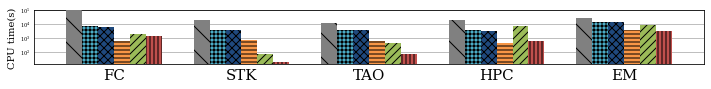

In [54]:
fontsize_tick=5
fontsize_xLabel=15
fontsize_yLabel=10
ax = graphdf.plot(kind='bar', linewidth = 4, align='center', width=0.75, \
                  color=algo_color.values(), legend=False, figsize=(12,1),zorder=3)

# 굿ㅋㅋㅋ 막대 사이에 간격 조금 주고 색깔 채도 맑게 조정하면 더 이쁠듯?
# 우리꺼는 막대 테두리 쳐줘도 좋은데 그것도 되려나
# 일단 다른것도 막대 테두리가 얇게 있으면 더 이쁘긴 하겠다

for container, hatch in zip(ax.containers, ('\\', '+++', 'xxx', '---', '///','|||')):
    for patch in container.patches:
        patch.set_hatch(hatch)

# plt figure settings
ax.grid(b=True,which="major",axis='y',zorder=0)
ax.set_yscale("log")
ax.set_xlabel("")
ax.set_ylabel('CPU time(s)', fontsize=fontsize_yLabel)
ax.set_ylim([0,100000])
# TODO: Put pattern in the bar graph

# remove ticks
ax.tick_params(axis ='both', which ='both', length = 0)
ax.tick_params(axis ='x', labelsize=fontsize_xLabel)
ax.tick_params(axis ='y', labelsize=fontsize_tick)
# rotate ticks
ax.tick_params(axis ='x', rotation = 0)

plt.savefig('asdf.pdf', bbox_inches='tight', format='pdf')

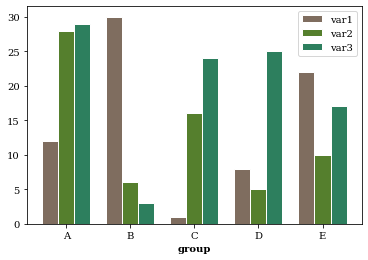

In [53]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25

# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])

# Create legend & Show graphic
plt.legend()
plt.show()


